In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cài đặt hiển thị
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Đọc dữ liệu
file_path = "/content/sample_data/train.csv"
df = pd.read_csv(file_path)

In [7]:
# 1. Kiểm tra dữ liệu tổng quát
print("📌 Kích thước dữ liệu:", df.shape)
print("\n📌 Các cột trong dữ liệu:", df.columns.tolist())

# 2. Kiểm tra dữ liệu thiếu
print("\n📌 Dữ liệu thiếu:")
print(df.isnull().sum())

📌 Kích thước dữ liệu: (58645, 13)

📌 Các cột trong dữ liệu: ['id', 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']

📌 Dữ liệu thiếu:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


In [8]:
# 3. Thống kê mô tả cho các biến số
print("\n📌 Mô tả thống kê:")
print(df.describe())


📌 Mô tả thống kê:
                 id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000            

In [16]:
# có mấy cái cấn: Max tuổi:123(trên 90 là bỏ được r)
#                 person income_max: 1.2 mil (outliner)
#                 person_emp_length: 123 years (outliner) (Bỏ từ 50 năm trở đi)
#                 loan_percent_income: có vài cái là 0% thì check xem tại sao
#                 loan_status: 14.2% chưa được duyệt vay

In [19]:
# 4. Phân phối nhãn mục tiêu
print("\n📌 Phân phối nhãn 'loan_status':")
print(df['loan_status'].value_counts(normalize=True))


📌 Phân phối nhãn 'loan_status':
loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64


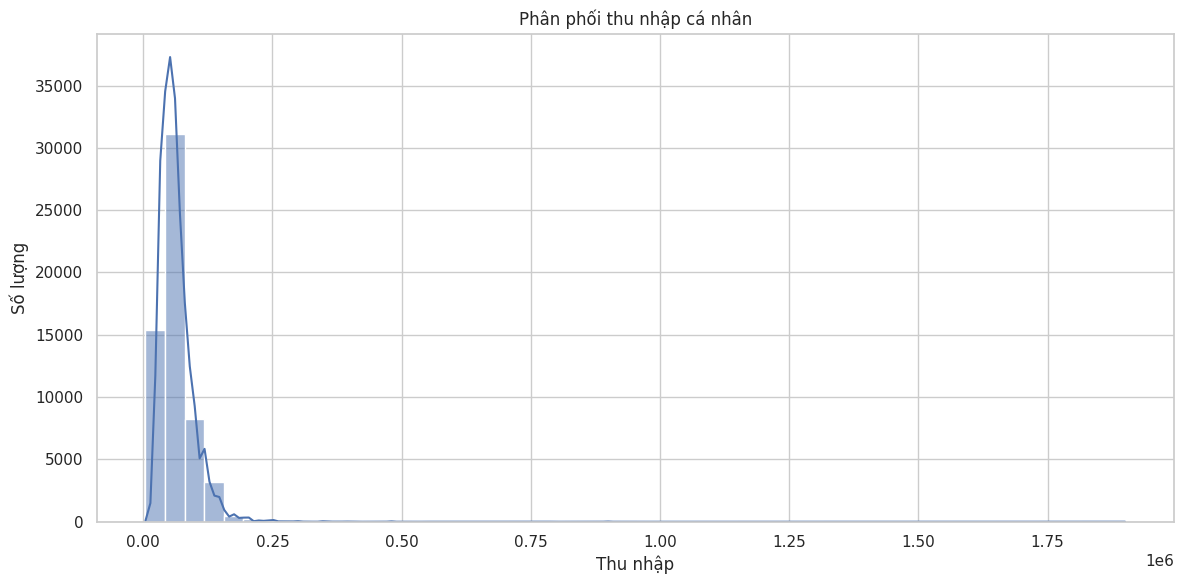

In [20]:
# 5. Phân phối thu nhập
plt.figure()
sns.histplot(df['person_income'], bins=50, kde=True)
plt.title("Phân phối thu nhập cá nhân")
plt.xlabel("Thu nhập")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()

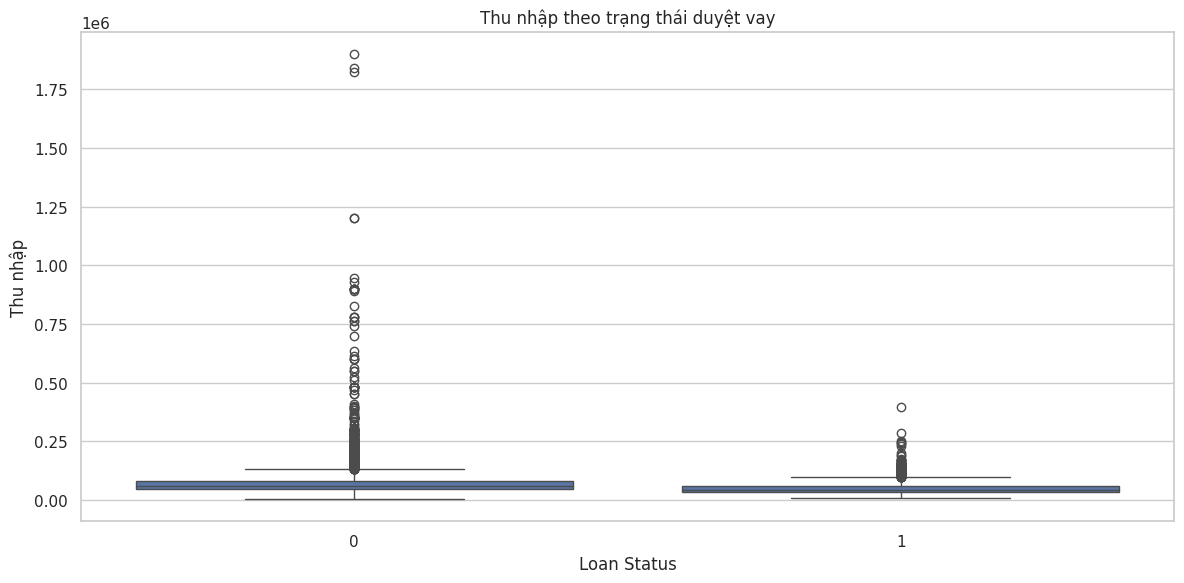

In [21]:
# 6. Boxplot: thu nhập theo trạng thái vay
plt.figure()
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title("Thu nhập theo trạng thái duyệt vay")
plt.xlabel("Loan Status")
plt.ylabel("Thu nhập")
plt.tight_layout()
plt.show()

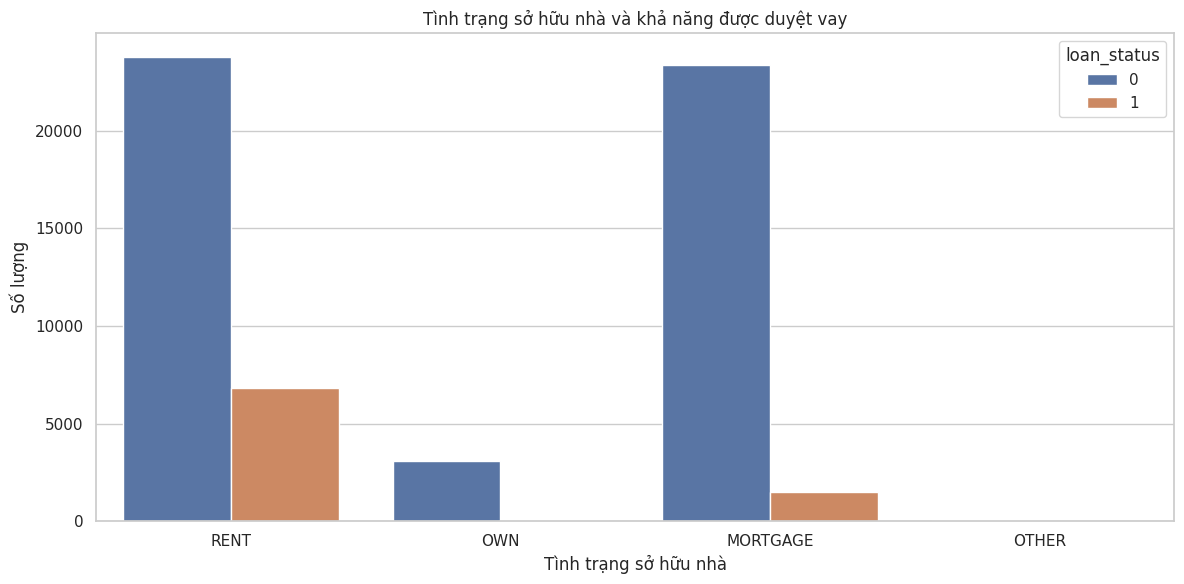

In [22]:
# 7. Barplot: tình trạng sở hữu nhà vs loan_status
plt.figure()
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title("Tình trạng sở hữu nhà và khả năng được duyệt vay")
plt.xlabel("Tình trạng sở hữu nhà")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()

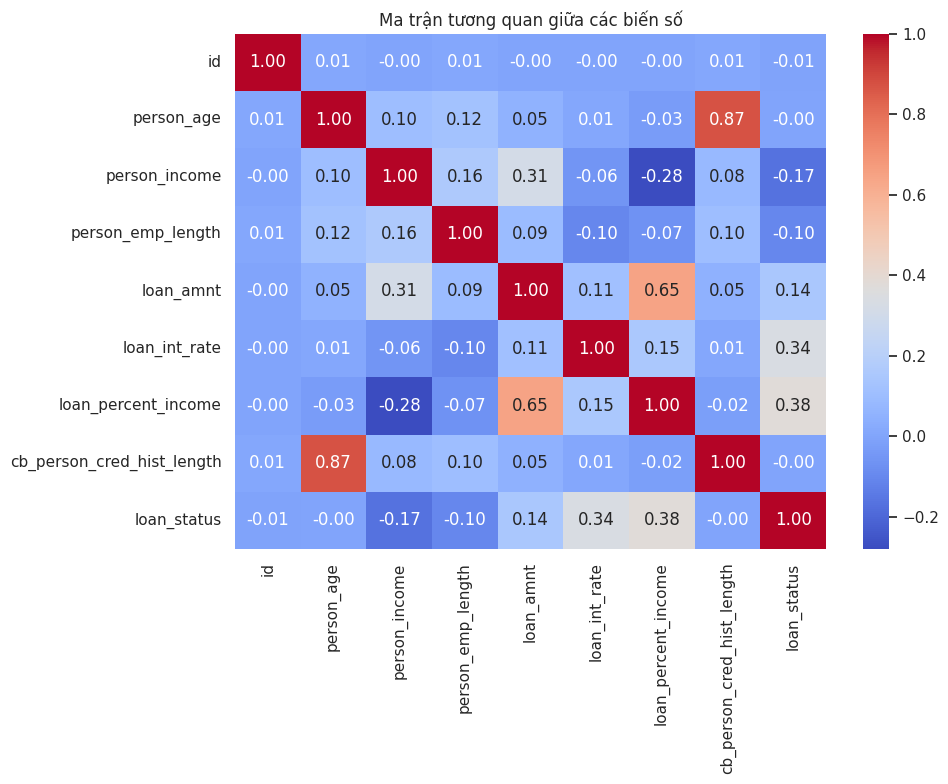

In [23]:
# 8. Ma trận tương quan
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.tight_layout()
plt.show()

In [24]:
# 9. (Tuỳ chọn) Value counts các biến phân loại
cat_columns = df.select_dtypes(include="object").columns.tolist()
for col in cat_columns:
    print(f"\n📌 Phân phối biến phân loại: {col}")
    print(df[col].value_counts())


📌 Phân phối biến phân loại: person_home_ownership
person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

📌 Phân phối biến phân loại: loan_intent
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

📌 Phân phối biến phân loại: loan_grade
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

📌 Phân phối biến phân loại: cb_person_default_on_file
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64
